In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime,date
import datetime as dt
from collections import Counter
from matplotlib.ticker import FuncFormatter

import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')


In [3]:
#load the data

file_path = Path('./Resources/loan_2014to2016.csv')
df = pd.read_csv('loan_2014to2016.csv')[:-2]


In [4]:
df.shape

(1091129, 151)

In [5]:
df.dtypes.reset_index()

index        0
0                                    Unnamed: 0    int64
1                                            id    int64
2                                     member_id  float64
3                                     loan_amnt  float64
4                                   funded_amnt  float64
5                               funded_amnt_inv  float64
6                                          term   object
7                                      int_rate   object
8                                   installment  float64
9                                         grade   object
10                                    sub_grade   object
11                                    emp_title   object
12                                   emp_length   object
13                               home_ownership   object
14                                   annual_inc  float64
15                          verification_status   object
16                                      issue_d   object
17                                  loan_status   object
18                                   pymnt_plan   object
19                                          url   object
20                                         desc   object
21                                      purpose   object
22                                        title   object
23                                     zip_code   object
24                                   addr_state   object
25                                          dti  float64
26                                  delinq_2yrs  float64
27                             earliest_cr_line   object
28                               fico_range_low  float64
29                              fico_range_high  float64
..                                          ...      ...
121                            sec_app_mort_acc  float64
122                            sec_app_open_acc  float64
123                          sec_app_revol_util  float64
124                         sec_app_open_act_il  float64
125                       sec_app_num_rev_accts  float64
126            sec_app_chargeoff_within_12_mths  float64
127          sec_app_collections_12_mths_ex_med  float64
128         sec_app_mths_since_last_major_derog  float64
129                               hardship_flag   object
130                               hardship_type   object
131                             hardship_reason   object
132                             hardship_status   object
133                               deferral_term  float64
134                             hardship_amount  float64
135                         hardship_start_date   object
136                           hardship_end_date   object
137                     payment_plan_start_date   object
138                             hardship_length  float64
139                                hardship_dpd  float64
140                        hardship_loan_status   object
141  orig_projected_additional_accrued_interest  float64
142              hardship_payoff_balance_amount  float64
143                hardship_last_payment_amount  float64
144                        debt_settlement_flag   object
145                   debt_settlement_flag_date   object
146                           settlement_status   object
147                             settlement_date   object
148                           settlement_amount  float64
149                       settlement_percentage  float64
150                             settlement_term  float64

[151 rows x 2 columns]

In [6]:
#Select initial relevant columns that we find intuitively important and cross check with some academical papers

cols = ['id', 'application_type', 'desc', 'loan_amnt', 'funded_amnt', 'term',
       'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'fico_range_high',
       'fico_range_low', 'revol_bal', 'revol_util', 'total_pymnt',
       'recoveries', 'last_pymnt_d']

In [7]:
print(f'{len(cols)} features selected')

# new dataframe of features
df = df[cols]

28 features selected


In [8]:
#df.sample(3).T

In [9]:
# Identify the type of each of these column for our undestanding and data formatting
float_cols = ['loan_amnt', 'funded_amnt','annual_inc',
                     'dti', 'revol_bal', 'delinq_2yrs', 'open_acc', 'pub_rec',
                                'fico_range_high', 'fico_range_low', 'total_pymnt', 'recoveries']
cat_cols = ['term', 'grade', 'sub_grade', 'desc', 'emp_length', 'home_ownership',
                    'verification_status', 'loan_status', 'purpose','application_type']
perc_cols = ['int_rate', 'revol_util']
date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d']


In [10]:
#Percent Formatting

# convert interest rate to numerical
df['int_rate'] = df['int_rate'].str.replace('%', '')
df['int_rate'] = df['int_rate'].astype('float') / 100

# convert revol_util to numerical
df['revol_util'] = df['revol_util'].str.replace('%', '')
df['revol_util'] = df['revol_util'].astype('float') / 100



In [11]:
#Date Formatting

# convert into datetime types and create new date-related fields
def make_dateval(s):
    return pd.to_datetime(s)

df.issue_d = df.issue_d.apply(make_dateval)
df.earliest_cr_line = df.earliest_cr_line.apply(make_dateval)
df.last_pymnt_d = df.last_pymnt_d.apply(make_dateval)


def make_year_month(t):
    m = str(t.month) if t.month>9 else '0'+str(t.month)
    return f'{t.year}_{m}'

df['year_months'] = df.issue_d.apply(make_year_month)




In [12]:
df.sample(3).T

1045513              25661    \
id                              93002213             34373384   
application_type              Individual           Individual   
desc                                 NaN                  NaN   
loan_amnt                          21450                 7500   
funded_amnt                        21450                 7500   
term                           36 months            36 months   
int_rate                          0.1149               0.1299   
grade                                  B                    C   
sub_grade                             B5                   C2   
emp_length                        1 year              2 years   
home_ownership                  MORTGAGE                 RENT   
annual_inc                         89000                44800   
verification_status      Source Verified             Verified   
issue_d              2016-11-01 00:00:00  2014-11-01 00:00:00   
loan_status                   Fully Paid          Charged Off   
purpose               debt_consolidation   debt_consolidation   
dti                                15.81                   24   
delinq_2yrs                            2                    0   
earliest_cr_line     2001-04-01 00:00:00  2004-10-01 00:00:00   
open_acc                              12                   31   
pub_rec                                1                    0   
fico_range_high                      674                  679   
fico_range_low                       670                  675   
revol_bal                          25423                17270   
revol_util                         0.523                0.583   
total_pymnt                      23466.2               4034.6   
recoveries                             0                    0   
last_pymnt_d         2017-09-01 00:00:00  2016-03-01 00:00:00   
year_months                      2016_11              2014_11   

                                 74509    
id                              27521474  
application_type              Individual  
desc                                 NaN  
loan_amnt                          14000  
funded_amnt                        14000  
term                           36 months  
int_rate                          0.0603  
grade                                  A  
sub_grade                             A1  
emp_length                       4 years  
home_ownership                  MORTGAGE  
annual_inc                        101000  
verification_status         Not Verified  
issue_d              2014-09-01 00:00:00  
loan_status                   Fully Paid  
purpose                      credit_card  
dti                                13.79  
delinq_2yrs                            0  
earliest_cr_line     1979-11-01 00:00:00  
open_acc                              10  
pub_rec                                0  
fico_range_high                      704  
fico_range_low                       700  
revol_bal                          14025  
revol_util                         0.623  
total_pymnt                      15054.5  
recoveries                             0  
last_pymnt_d         2016-06-01 00:00:00  
year_months                      2014_09

In [13]:
#Loan status statistic for grouping of loans later
df.loan_status.value_counts(dropna=False, normalize = True)

Fully Paid            0.773939
Charged Off           0.184107
Current               0.040548
Late (31-120 days)    0.000626
In Grace Period       0.000609
Late (16-30 days)     0.000140
Default               0.000032
Name: loan_status, dtype: float64

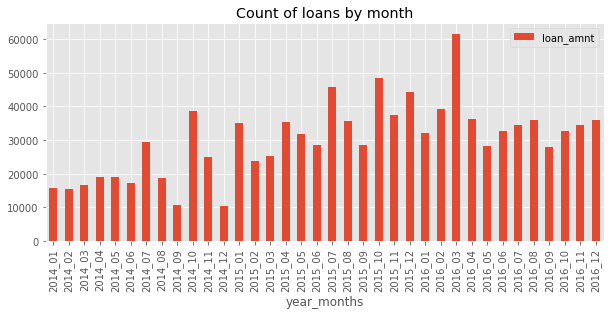

In [254]:
#Check the overall data available through visualization

check_loan_amnt = pd.pivot_table(df, values='loan_amnt', index=['year_months'], aggfunc=np.count_nonzero)
check_loan_amnt.plot.bar(figsize=(10,4),title="Count of loans by month")

In [15]:
#find missing data

missing = df.isna().sum().sort_values(ascending=False)
missing

desc                   1075782
emp_length               64050
last_pymnt_d               954
revol_util                 551
dti                         65
year_months                  0
verification_status          0
application_type             0
loan_amnt                    0
funded_amnt                  0
term                         0
int_rate                     0
grade                        0
sub_grade                    0
home_ownership               0
annual_inc                   0
loan_status                  0
issue_d                      0
purpose                      0
delinq_2yrs                  0
earliest_cr_line             0
open_acc                     0
pub_rec                      0
fico_range_high              0
fico_range_low               0
revol_bal                    0
total_pymnt                  0
recoveries                   0
id                           0
dtype: int64

In [16]:
#decide on what to do with missing data

df.desc.fillna('', inplace=True) #this is optional input for people to fill
df.revol_util.fillna(0, inplace=True) #small amount of loan does not have this data
df.dti.fillna(0, inplace=True) #small amount of loan does not have this data


In [17]:
#check missing last_payment_d and it is all coming from charged off status
print(df[df.last_pymnt_d.isna()]['loan_status'].value_counts())

Charged Off    954
Name: loan_status, dtype: int64


In [18]:
#check the data for Charge Off loan
df[df.last_pymnt_d.isna()].head(10).T

4288                 5463   \
id                              37077114             36510814   
application_type              Individual           Individual   
desc                                                            
loan_amnt                          28000                14375   
funded_amnt                        28000                14375   
term                           60 months            60 months   
int_rate                          0.1144               0.2099   
grade                                  B                    E   
sub_grade                             B4                   E4   
emp_length                       4 years               1 year   
home_ownership                  MORTGAGE                 RENT   
annual_inc                         93000                40000   
verification_status      Source Verified      Source Verified   
issue_d              2014-12-01 00:00:00  2014-12-01 00:00:00   
loan_status                  Charged Off          Charged Off   
purpose                 home_improvement   debt_consolidation   
dti                                  4.7                21.09   
delinq_2yrs                            0                    0   
earliest_cr_line     2002-10-01 00:00:00  2006-12-01 00:00:00   
open_acc                               5                    5   
pub_rec                                0                    0   
fico_range_high                      814                  714   
fico_range_low                       810                  710   
revol_bal                            117                 9751   
revol_util                         0.004                0.995   
total_pymnt                      3930.71                    0   
recoveries                       3930.71                    0   
last_pymnt_d                         NaT                  NaT   
year_months                      2014_12              2014_12   

                                   5986                 7423   \
id                              36421596             36261027   
application_type              Individual           Individual   
desc                                                            
loan_amnt                          11475                30375   
funded_amnt                        11475                30375   
term                           60 months            60 months   
int_rate                          0.2099               0.2399   
grade                                  E                    F   
sub_grade                             E4                   F2   
emp_length                       4 years                  NaN   
home_ownership                      RENT                 RENT   
annual_inc                         25000                80000   
verification_status             Verified             Verified   
issue_d              2014-12-01 00:00:00  2014-12-01 00:00:00   
loan_status                  Charged Off          Charged Off   
purpose               debt_consolidation   debt_consolidation   
dti                                13.59                37.11   
delinq_2yrs                            0                    0   
earliest_cr_line     2003-04-01 00:00:00  2000-12-01 00:00:00   
open_acc                              12                   11   
pub_rec                                0                    1   
fico_range_high                      729                  674   
fico_range_low                       725                  670   
revol_bal                          23188                16442   
revol_util                          0.32                 0.79   
total_pymnt                       1672.4                    0   
recoveries                        1672.4                    0   
last_pymnt_d                         NaT                  NaT   
year_months                      2014_12              2014_12   

                                   8530                 9139   \
id                              36270297             36099806   
app

In [19]:
#we think credit history (in term of years) would be an interesting feature to model
credit_history = np.round((df.issue_d - df.earliest_cr_line) / np.timedelta64(1,'Y'))

# create a new field for credit history in Years
df['credit_hist'] = credit_history

# For missing emp.length, assume it's roughly equivalent to years since earliest credit line
def distance_years(d):
    if d >=10:   
        return '10+ years'
    elif d <1:  
        return '< 1 year'
    else:              
        return f'{int(d)} years'

df.emp_length = np.where(df.emp_length.isna(), 
                         df.credit_hist.apply(distance_years), 
                         df.emp_length)


In [20]:
# for missing last payment date, it happens for small percentage of bad loan (charged off). 
# we decide to drop this now and revisit once we run feature importance logic

df = df[df['last_pymnt_d'].notna()]

In [21]:
# final check to ensure no missing data

missing = df.isna().sum().sort_values(ascending=False)
missing

year_months            0
issue_d                0
application_type       0
desc                   0
loan_amnt              0
funded_amnt            0
term                   0
int_rate               0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
last_pymnt_d           0
purpose                0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
open_acc               0
pub_rec                0
fico_range_high        0
fico_range_low         0
revol_bal              0
revol_util             0
total_pymnt            0
recoveries             0
id                     0
dtype: int64

In [22]:
# check count of loans by employment length and nothing is missing

df.emp_length.value_counts()

10+ years    430522
2 years       97502
3 years       86558
< 1 year      84157
1 year        71169
5 years       64758
4 years       64255
8 years       53005
6 years       47715
7 years       46231
9 years       44303
Name: emp_length, dtype: int64

In [23]:
# create a new field 'has description' in case it is useful
df['has_desc'] = np.vectorize(len)(df.desc)>0
df.has_desc = df.has_desc.astype(int)



In [24]:
#Create new field for loan_length, we will use for return calculation

df['loan_length'] = (df.last_pymnt_d - df.issue_d) / np.timedelta64(1, 'M')

In [25]:
#Saving Clean DataFrame

#df.to_csv('cleaned_dataframe.csv', index=False)


In [27]:
# Remove all rows for loans that were paid back on the days they were issued - potential operation error

n_rows = len(df)
df = df[df.loan_length != 0]
print("Removed " + str(n_rows - len(df)) + " rows")

Removed 3678 rows


In [28]:
#extract term months as new feature

df['term_num'] = df.term.str.extract('(\d+)',expand=False).astype(int)


In [29]:
#reformat the employment length to integer from string

d =  {'< 1 year':0, '1 year':1, '2 years':2, '3 years':3, '4 years':4, '5 years':5, 
                    '6 years':6, '7 years':7, '8 years':8, '9 years':9, '10+ years':10}

df['emp_length_num'] = df['emp_length']. map(d)

In [30]:
#calculate low range % profit in annualized for each loan

df['ret_low'] = ( (df.total_pymnt - df.funded_amnt) 
                                            / df.funded_amnt ) * (12 / df['term_num'])

In [31]:
#calculate high range % profit in annualized for each loan

df['ret_high'] = ( (df.total_pymnt - df.funded_amnt) 
                                            / df.funded_amnt ) * (12 / df['loan_length'])

df.loc[df.ret_high < 0,'ret_high'] = df.ret_low[df.ret_high < 0]

In [270]:
df.sample(3).T

660417               558465  \
id                              75738782             45504543   
application_type              Individual           Individual   
desc                                                            
loan_amnt                          18000                10000   
funded_amnt                        18000                10000   
term                           36 months            36 months   
int_rate                          0.1367               0.1333   
grade                                  C                    C   
sub_grade                             C3                   C3   
emp_length                       6 years               1 year   
home_ownership                  MORTGAGE             MORTGAGE   
annual_inc                         63000                52000   
verification_status             Verified         Not Verified   
issue_d              2016-03-01 00:00:00  2015-04-01 00:00:00   
loan_status                  Charged Off           Fully Paid   
purpose               debt_consolidation                other   
dti                                22.78                39.03   
delinq_2yrs                            0                    0   
earliest_cr_line     2011-06-01 00:00:00  1989-07-01 00:00:00   
open_acc                               8                    5   
pub_rec                                0                    0   
fico_range_high                      664                  734   
fico_range_low                       660                  730   
revol_bal                          22794                18540   
revol_util                         0.835                0.602   
total_pymnt                      13045.9              12053.2   
recoveries                          6324                    0   
last_pymnt_d         2017-03-01 00:00:00  2017-08-01 00:00:00   
year_months                      2016_03              2015_04   
has_desc                               0                    0   
credit_hist                            5                   26   
loan_length                       11.992              28.0252   
term_num                              36                   36   
emp_length_num                         6                    1   
ret_low                       -0.0917435            0.0684403   
ret_high                      -0.0917435            0.0879155   
good                                   0                    1   

                                  108537  
id                              22432014  
application_type              Individual  
desc                                      
loan_amnt                          35000  
funded_amnt                        35000  
term                           36 months  
int_rate                          0.1167  
grade                                  B  
sub_grade                             B4  
emp_length                       7 years  
home_ownership                  MORTGAGE  
annual_inc                        140000  
verification_status             Verified  
issue_d              2014-07-01 00:00:00  
loan_status                   Fully Paid  
purpose                      credit_card  
dti                                11.22  
delinq_2yrs                            1  
earliest_cr_line     1995-05-01 00:00:00  
open_acc                              11  
pub_rec                                0  
fico_range_high                      699  
fico_range_low                       695  
revol_bal                          35615  
revol_util                         0.436  
total_pymnt                      41616.1  
recoveries                             0  
last_pymnt_d         2017-05-01 00:00:00  
year_months                      2014_07  
has_desc                               0  
credit_hist                           19  
loan_length                      34.0048  
term_num                              36  
emp_length_num                         7  
ret_low                        0.0630108  
ret_high       

In [32]:
# double check for missing data

missing = df.isna().sum().sort_values(ascending=False)
missing

ret_high               0
ret_low                0
purpose                0
loan_status            0
issue_d                0
verification_status    0
annual_inc             0
home_ownership         0
emp_length             0
sub_grade              0
grade                  0
int_rate               0
term                   0
funded_amnt            0
loan_amnt              0
desc                   0
application_type       0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
last_pymnt_d           0
emp_length_num         0
term_num               0
loan_length            0
credit_hist            0
has_desc               0
year_months            0
recoveries             0
open_acc               0
total_pymnt            0
revol_util             0
revol_bal              0
fico_range_low         0
fico_range_high        0
pub_rec                0
id                     0
dtype: int64

In [33]:
#identify good loan in our data

good_loans = ['Fully Paid']
df['good'] = df.loan_status.isin(good_loans).astype(int)

In [35]:
df.good.value_counts(dropna=False, normalize=True)

1    0.773857
0    0.226143
Name: good, dtype: float64

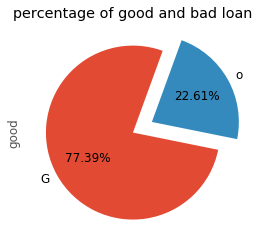

In [64]:
df["good"].value_counts().plot.pie(title= "percentage of good and bad loan",explode=[0,0.25], autopct='%1.2f%%',
                                             labels="Good Loan %", fontsize=12, startangle=70)

In [36]:
#Saving Clean DataFrame

#df.to_csv('cleaned_dataframe_w_return.csv', index=False)


In [37]:
# identify current live loans and past/serviced loan
live_loans = ['Current','Late (31-120 days)','Late (16-30 days)','In Grace Period']
serviced_loans =['Fully Paid','Charged Off','Default']

df_live = df[df.loan_status.isin(live_loans)]
df_serviced = df[df.loan_status.isin(serviced_loans)]

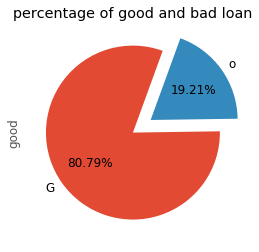

In [236]:
# good loan percentage in our expired/serviced loans population
df_serviced["good"].value_counts().plot.pie(title= "percentage of good and bad loan",explode=[0,0.25], autopct='%1.2f%%',
                                             labels="Good Loan %", fontsize=12, startangle=70)

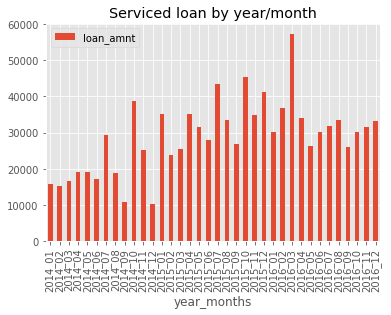

In [82]:
check_df_serviced = pd.pivot_table(df_serviced, values='loan_amnt', index=['year_months'], aggfunc=np.count_nonzero)
check_df_serviced.plot.bar(title="Serviced loan by year/month")

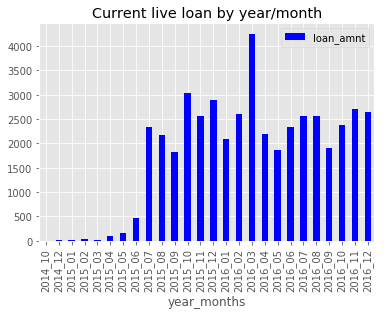

In [85]:
check_df_live = pd.pivot_table(df_live, values='loan_amnt', index=['year_months'], aggfunc=np.count_nonzero)
check_df_live.plot.bar(title="Current live loan by year/month",color='b')

In [38]:
#Saving Clean DataFrame

#df_serviced.to_csv('serviced_dataframe_w_return.csv', index=False)


In [78]:
#Loan status statistic for grouping of loans later
df_serviced.loan_status.value_counts(dropna=False, normalize=True)


Fully Paid     0.807869
Charged Off    0.192097
Default        0.000034
Name: loan_status, dtype: float64

In [261]:
def plot_categorical(f):
    _,axes = plt.subplots(1, 2, figsize=(14, 4))
    ax0,ax1=axes[0],axes[1]

    distr = df.groupby(f).count().good
    ax0.bar(distr.index, distr.values)
    rot=0 if len(distr)<3 else 90
    for pos, val in enumerate(distr.values):
        ax0.text(pos, 1.02*val, f'{int(val/1000):,}', rotation=rot, color='k', ha='center')
    ax0.set_title('Count of loans per category (in k)')
    plt.setp( ax0.xaxis.get_majorticklabels(), rotation=rot )
    ax0.set_xlabel(f)

    distr = df.groupby(f).good.mean().sort_values(ascending=False)
    ax1.bar(distr.index, distr.values)
    rot=0 if len(distr)<3 else 90
    for pos, val in enumerate(distr.values):
        ax1.text(pos, 1.02*val, f'{val:.3f}', rotation=rot, color='k', ha='center')
    ax1.set_ylim(0,1)
    ax1.set_title('% portion of good loans')
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=rot )
    ax1.set_xlabel(f)

    plt.show()

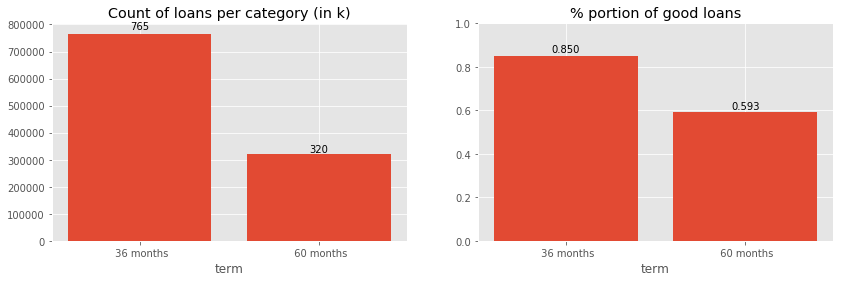

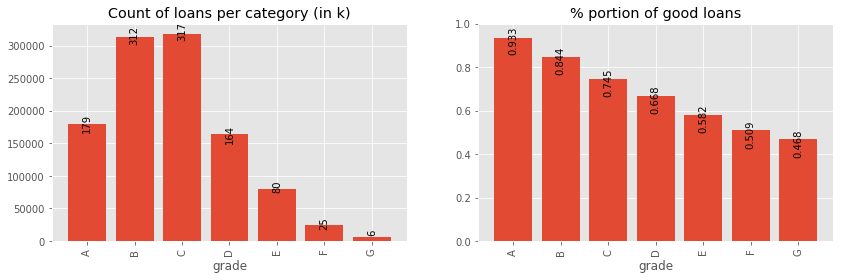

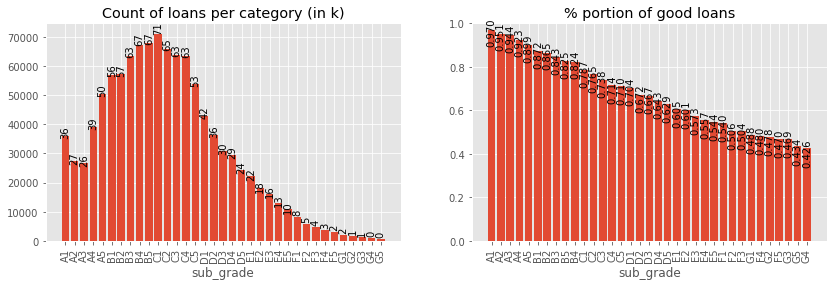

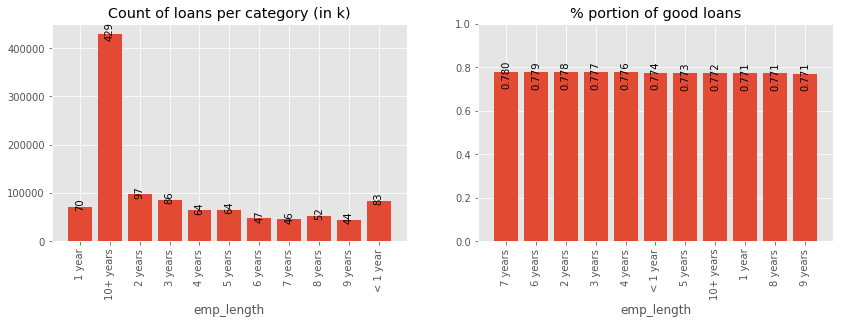

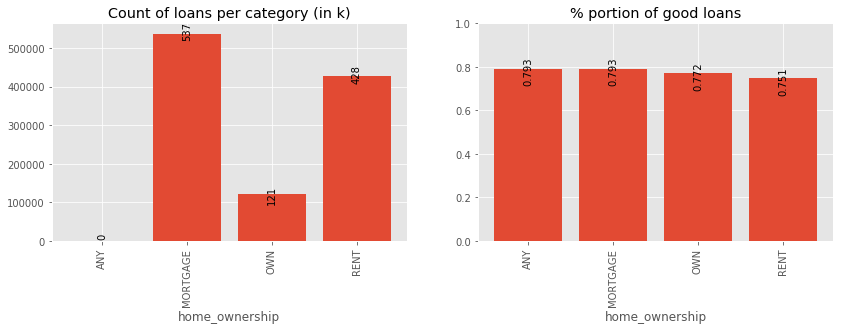

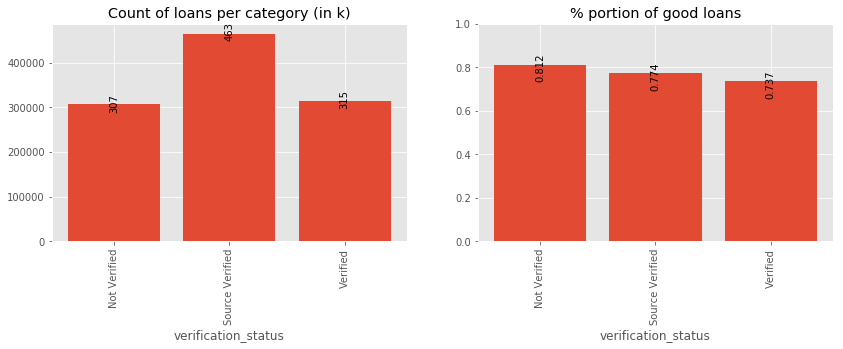

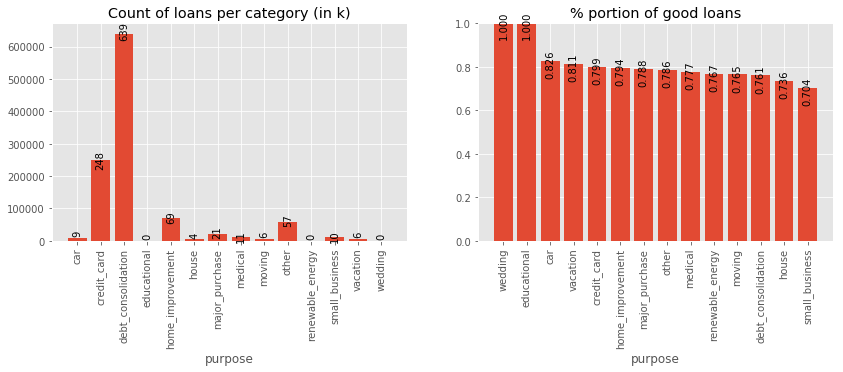

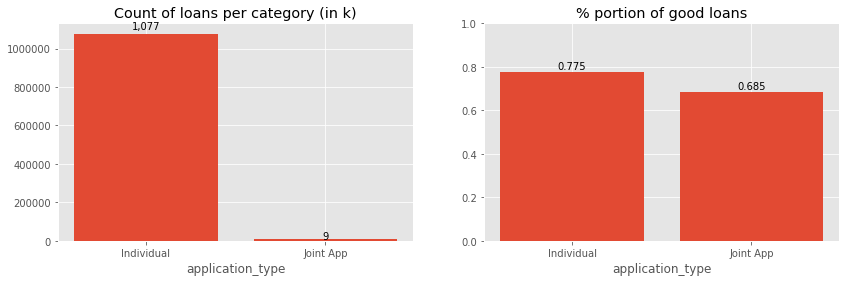

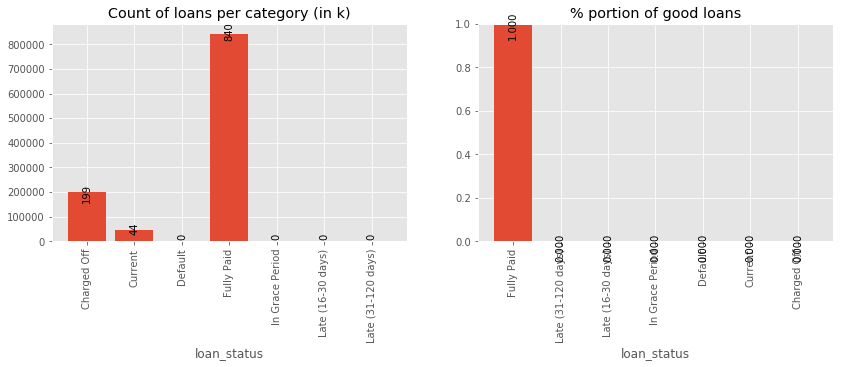

In [263]:
#charts for categorical data for df for all live and serviced loans

category_cols = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
                    'verification_status', 'purpose','application_type','loan_status']

for f in category_cols:
    plot_categorical(f)

In [266]:
def plot_numeric(n):
    _,axes = plt.subplots(1, 2, figsize=(14, 4))
    ax0,ax1=axes[0],axes[1]

    ax0.hist(df[n], bins=40)
    ax0.set_title(f'{n} distribution')
    ax0.set_xlabel(n)

    ax1 = sns.boxplot(n,'good',data=df,orient='h')
    ax1.set_title(f'{n} for good & bad loan')
    ax1.set_xlabel(n)

    plt.show()


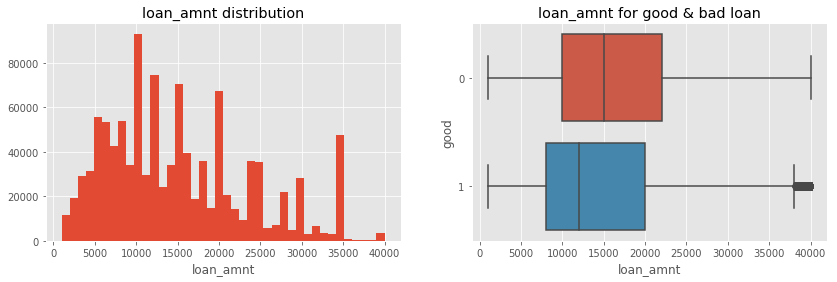

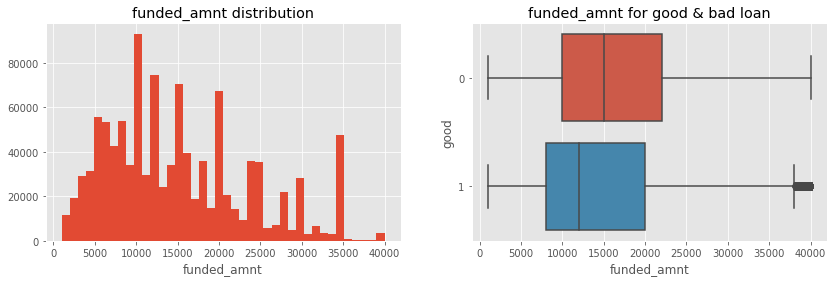

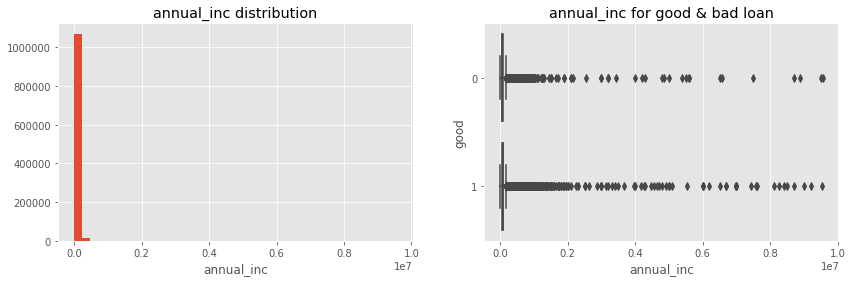

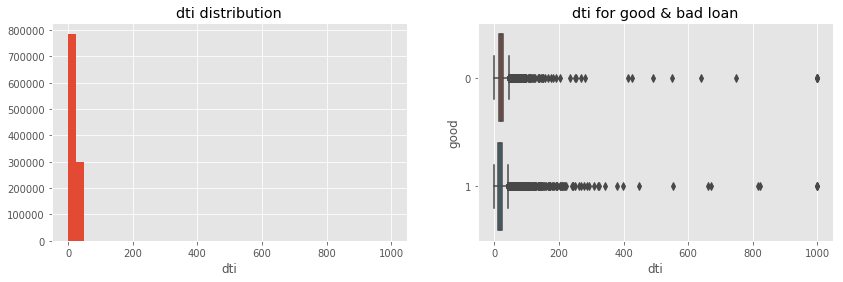

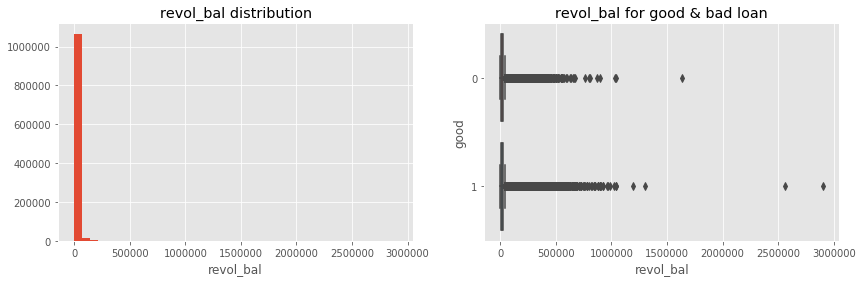

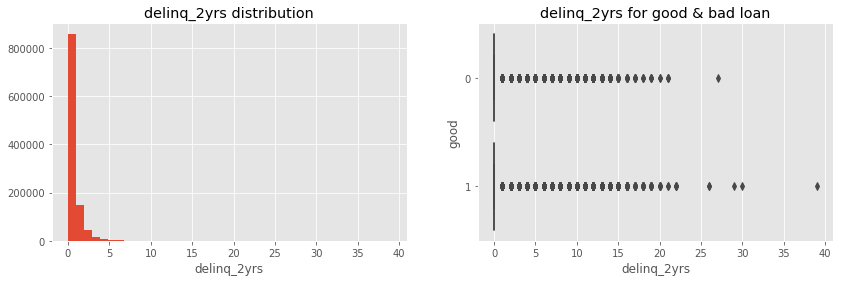

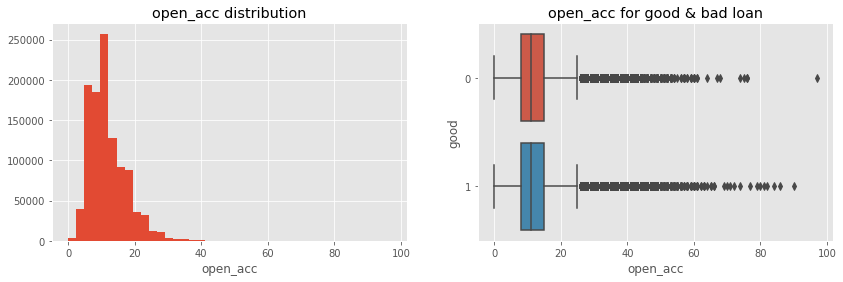

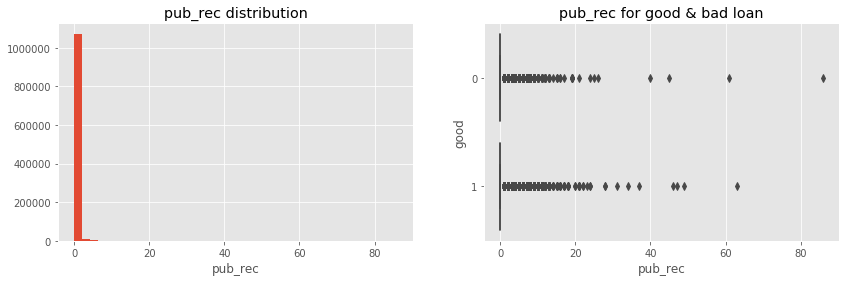

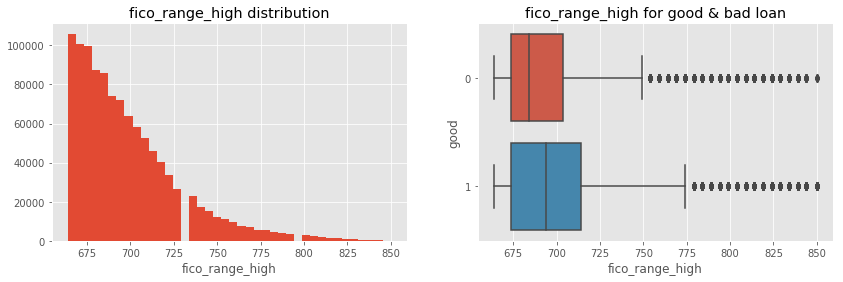

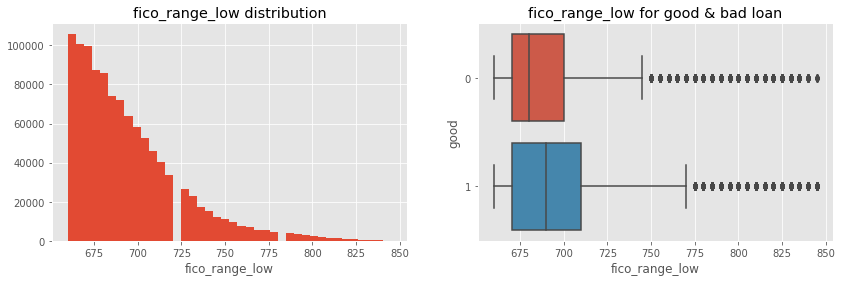

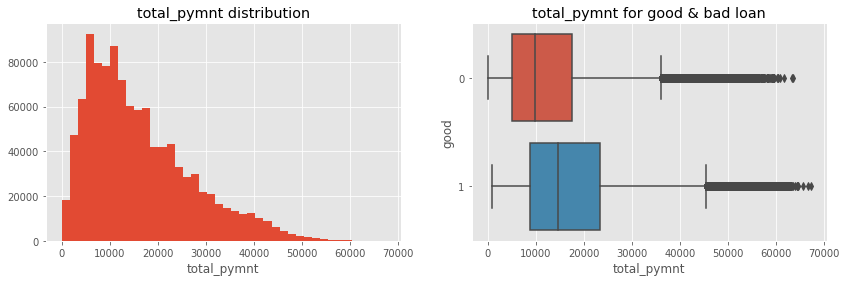

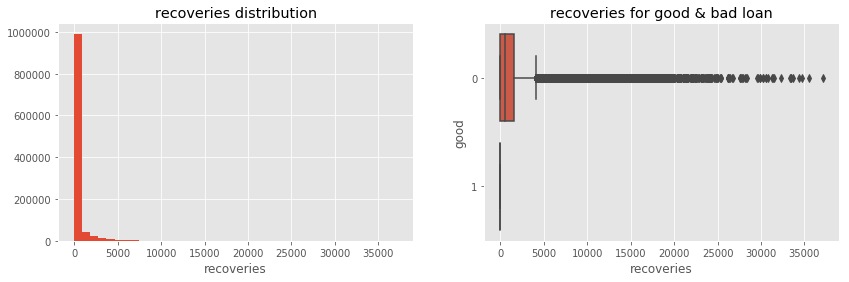

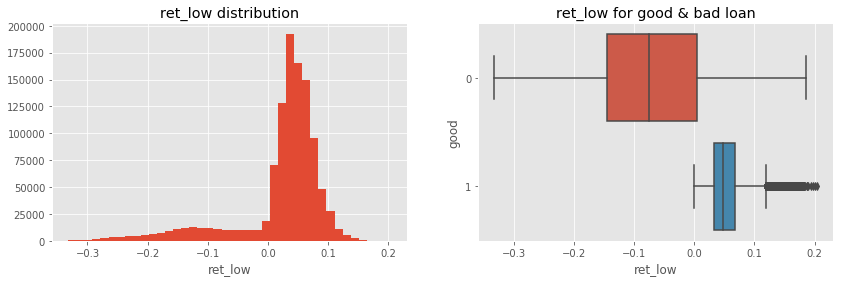

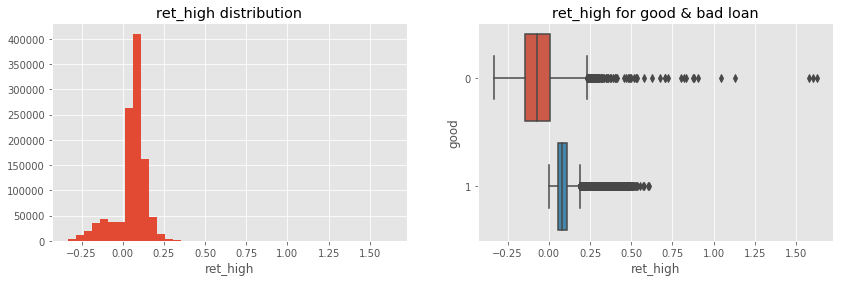

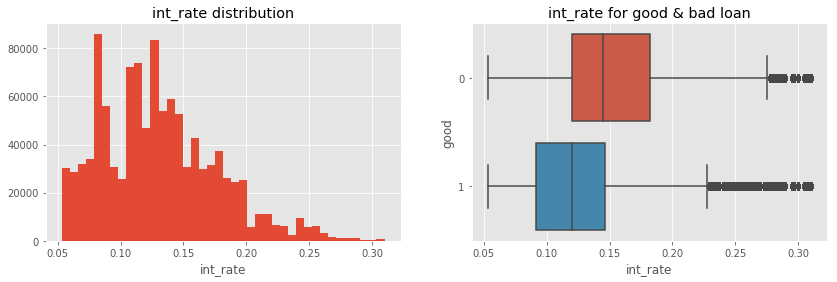

In [268]:
#charts for categorical data for df for all live and serviced loans

numeric_cols = ['loan_amnt', 'funded_amnt', 'annual_inc',
                     'dti', 'revol_bal', 'delinq_2yrs', 'open_acc', 'pub_rec',
                                'fico_range_high', 'fico_range_low', 'total_pymnt', 'recoveries','ret_low','ret_high',"int_rate"]

for n in numeric_cols:
    plot_numeric(n)


In [212]:
# looking deeper into the grade and subgrade data

col = 'sub_grade'
grade_dict = {
'good_pct': df.groupby(col).good.mean(),
'default_pct': (1-df.groupby(col).good.mean()),
'loan_amount': df.groupby(col).loan_amnt.mean(),
'fico_low': df.groupby(col).fico_range_low.mean(),
'annual_income': df.groupby(col).annual_inc.mean(),
'interest_rate': df.groupby(col).int_rate.mean(),
'DTI': df.groupby(col).int_rate.mean(),
'description': df.groupby(col).has_desc.mean(),
'credit_history': df.groupby(col).dti.mean(),
'return_low_range': df.groupby(col).ret_low.mean(),
'return_high_range': df.groupby(col).ret_high.mean(),
}

In [213]:
grade_df = pd.DataFrame(grade_dict)
grade_df

good_pct  default_pct   loan_amount    fico_low  annual_income  \
sub_grade                                                                   
A1         0.969821     0.030179  14536.705070  743.760892  101732.769478   
A2         0.950741     0.049259  13955.717726  728.842589   91831.553566   
A3         0.944144     0.055856  14144.122777  720.237827   90577.849226   
A4         0.922822     0.077178  14687.432412  714.232044   89734.345031   
A5         0.898780     0.101220  14830.036668  709.745310   87087.897955   
B1         0.872138     0.127862  13800.348739  700.676861   83799.928191   
B2         0.864931     0.135069  13669.353174  696.809171   80870.419605   
B3         0.843460     0.156540  14363.195179  696.274553   80228.065848   
B4         0.823838     0.176162  13981.372593  693.991068   77179.451343   
B5         0.824990     0.175010  13062.793179  689.115756   74074.238301   
C1         0.786709     0.213291  13873.327786  688.787355   74761.165380   
C2         0.764734     0.235266  14269.564375  687.839123   74270.034044   
C3         0.737863     0.262137  14905.036739  687.223356   74775.963303   
C4         0.714207     0.285793  15302.372545  686.185326   73449.177815   
C5         0.709718     0.290282  15179.844385  685.721157   73070.701473   
D1         0.703946     0.296054  15101.721340  683.619075   69728.209211   
D2         0.671975     0.328025  15847.234480  683.807592   70152.402113   
D3         0.667002     0.332998  15954.147450  683.259337   68909.404074   
D4         0.643099     0.356901  16742.646412  682.980659   71592.217975   
D5         0.628817     0.371183  17032.896684  682.867505   70685.453231   
E1         0.605471     0.394529  17402.267811  682.416520   70368.799650   
E2         0.601118     0.398882  17891.878769  681.475682   71145.469805   
E3         0.572566     0.427434  18015.399099  681.813075   70441.457124   
E4         0.557219     0.442781  18582.448434  681.245225   71844.372862   
E5         0.544397     0.455603  18591.838195  681.139007   71007.044117   
F1         0.539940     0.460060  18551.990764  680.753245   70815.919848   
F2         0.506290     0.493710  19313.044033  680.851751   71813.375286   
F3         0.504466     0.495534  18803.615483  679.582093   70329.294972   
F4         0.480229     0.519771  18981.265340  679.147805   69289.977846   
F5         0.469859     0.530141  19472.502584  679.846710   70353.734172   
G1         0.487996     0.512004  19582.202352  679.169525   70347.548574   
G2         0.478125     0.521875  19323.125000  678.459375   68950.863494   
G3         0.468830     0.531170  20099.231426  677.002562   71562.342784   
G4         0.425743     0.574257  20759.653465  679.474010   72714.167252   
G5         0.433908     0.566092  20865.445402  678.132184   75951.181523   

           interest_rate       DTI  description  credit_history  \
sub_grade                                                         
A1              0.054695  0.054695     0.005615       14.599026   
A2              0.064963  0.064963     0.011019       15.712078   
A3              0.070609  0.070609     0.017481       16.466491   
A4              0.074434  0.074434     0.018517       16.372034   
A5              0.080981  0.080981     0.017668       16.751255   
B1              0.085580  0.085580     0.015599       17.077338   
B2              0.095458  0.095458     0.016569       17.431263   
B3              0.103615  0.103615     0.017686       17.785492   
B4              0.111687  0.111687     0.015431       17.983740   
B5              0.117301  0.117301     0.015921       18.311190   
C1              0.124837  0.124837     0.012414       18.708630   
C2              0.131046  0.131046     0.012720       19.126996   
C3              0.137092  0.137092     0.014272       19.309450   
C4              0.143603  0.143603     0.012438       19.584601   
C5              0.151543  0.151543     0.014596       20.050356   
D1              0.1602

In [289]:
grade_df.hvplot(y=['interest_rate','default_pct'],label='% Defaults and interest rates per sub-grade')

:NdOverlay   [Variable]
   :Curve   [sub_grade]   (value)

In [291]:
grade_df.hvplot(y=['return_low_range','return_high_range'],label='% Return on Investment')

:NdOverlay   [Variable]
   :Curve   [sub_grade]   (value)

In [302]:
pivot_low = pd.pivot_table(df, values='ret_low',columns=['good'], index=['sub_grade'], aggfunc=np.mean)
pivot_low_df = pd.DataFrame(dummy1.to_records()).rename(columns={'0':'default_ret_low','1':'good_ret_low'})
pivot_high = pd.pivot_table(df, values='ret_high',columns=['good'], index=['sub_grade'], aggfunc=np.mean)
pivot_high_df = pd.DataFrame(dummy2.to_records()).rename(columns={'0':'default_ret_high','1':'good_ret_high'})
return_sub_grade = pd.merge(dummy1_df,dummy2_df,how='inner',on='sub_grade')
return_sub_grade.set_index('sub_grade',inplace=True)
return_sub_grade = pd.merge(grade_df,return_sub_grade, how='inner',on='sub_grade')
return_sub_grade.iloc[:,9:15]

return_low_range  return_high_range  default_ret_low  good_ret_low  \
sub_grade                                                                       
A1                 0.019801           0.031039        -0.114755      0.023988   
A2                 0.021669           0.035367        -0.108059      0.028390   
A3                 0.023058           0.037923        -0.110451      0.030957   
A4                 0.022622           0.038289        -0.096301      0.032568   
A5                 0.023322           0.040659        -0.083352      0.035335   
B1                 0.022145           0.040700        -0.079595      0.037061   
B2                 0.024304           0.045376        -0.083665      0.041165   
B3                 0.025386           0.048514        -0.077903      0.044556   
B4                 0.025776           0.050904        -0.076724      0.047694   
B5                 0.025295           0.051411        -0.092627      0.050310   
C1                 0.024167           0.052560        -0.081297      0.052761   
C2                 0.022986           0.053053        -0.080765      0.054905   
C3                 0.023261           0.055107        -0.071300      0.056856   
C4                 0.021936           0.055508        -0.070681      0.058997   
C5                 0.022109           0.058300        -0.074446      0.061602   
D1                 0.023071           0.059928        -0.079635      0.066265   
D2                 0.020933           0.060674        -0.076785      0.068634   
D3                 0.022436           0.063585        -0.075285      0.071223   
D4                 0.021206           0.065114        -0.070674      0.072196   
D5                 0.020338           0.066962        -0.069976      0.073649   
E1                 0.019273           0.066855        -0.065843      0.074735   
E2                 0.018997           0.066814        -0.068900      0.077322   
E3                 0.017631           0.068855        -0.062113      0.077161   
E4                 0.015883           0.069782        -0.062948      0.078524   
E5                 0.013803           0.070703        -0.065882      0.080492   
F1                 0.015767           0.075155        -0.062887      0.082785   
F2                 0.011302           0.071446        -0.064007      0.084740   
F3                 0.011937           0.072456        -0.065606      0.088106   
F4                 0.007505           0.070101        -0.066396      0.087491   
F5                 0.002100           0.066837        -0.074308      0.088311   
G1                 0.006387           0.076800        -0.070945      0.087524   
G2                 0.005819           0.074849        -0.070386      0.088997   
G3                 0.007784           0.078673        -0.064947      0.090187   
G4                -0.004083           0.063041        -0.070475      0.085468   
G5                 0.003415           0.069345        -0.062523      0.089441   

           default_ret_high  good_ret_high  
sub_grade                                   
A1                -0.114139       0.035557  
A2                -0.107583       0.042773  
A3                -0.110146       0.046682  
A4                -0.095981       0.049519  
A5                -0.081817       0.054452  
B1                -0.079035       0.058254  
B2                -0.082999       0.065423  
B3                -0.077070       0.071821  
B4                -0.075872       0.078013  
B5                -0.091645       0.081759  
C1                -0.080223       0.088559  
C2                -0.079493       0.093830  
C3                -0.069662       0.099434  
C4                -0.069047       0.105349  
C5                -0.072595       0.111837  
D1                -0.077691       0.117806  
D2                -0.074459       0.126639  
D3                -0.072666       0.131608  
D4                -0.067894       0.138930  
D5                -0.067029       0.146056  
E1                -0.06

In [240]:
#Saving DataFrame with returns

#return_sub_grade.to_csv('subgrade_dataframe_w_return.csv', index=True)
